In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
sheets = pd.read_excel('Protein lengths.xlsx', sheet_name=['Бактерии', 'Эукариоты'])
sheets = pd.concat(sheets, names=['Sheet', 'Index'])
sheets.index = sheets.index.droplevel('Index')
sheets

,Name,Length,Name.1,Length.1,Name.2,Length.2,Name.3,Length.3,Name.4,Length.4,Name.5,Length.5
Sheet,,,,,,,,,,,,
Бактерии,CDAS_BACSU,207.0,DAPAT_CHLTR,394.0,ACNA_ECOLI,891.0,PYRG_MYCMS,532.0,ABC1_MYCTU,865.0,GLMU_PROMA,452.0
Бактерии,BACB_BACSU,235.0,PYRG_CHLTR,539.0,ALSE_ECOLI,231.0,HPRK_MYCMS,313.0,AP4A_MYCTU,195.0,Q7VAU0_PROMA,519.0
Бактерии,ACNA_BACSU,909.0,CH60_CHLTR,544.0,ALLD_ECOLI,349.0,IXTPA_MYCMS,200.0,BLAC_MYCTU,307.0,PSBA_PROMA,360.0
Бактерии,CHAA_BACSU,351.0,RIBBA_CHLTR,424.0,AZOR_ECOLI,201.0,Q6MTY5_MYCMS,363.0,SODC_MYCTU,240.0,RLMN_PROMA,348.0
Бактерии,ZUR_BACSU,145.0,CADD_CHLTR,231.0,CAS6_ECOLI,199.0,ACKA_MYCMS,393.0,PPMNT_MYCTU,874.0,KPRS_PROMA,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Эукариоты,W0UUZ1_CAVPO,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Эукариоты,W0UUZ4_CAVPO,197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Эукариоты,W0UVD7_CAVPO,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
frames = list()

for column in filter(lambda x: 'Name' in x, sheets.columns):
    # if 'Name' not in column: continue
    split = sheets[column].str.split('_', expand=True)
    length = '.'.join(['Length'] + column.split('.')[1:])
    frame = pd.DataFrame({
        'Name': split[0],
        'Mnemonics': split[1],
        'Length': sheets[length],
    }).dropna(axis=0)
    frames += [frame]

frames = pd.concat(frames)

mnemonics = pd.read_csv('mnemonics.csv', index_col='Мнемоника', squeeze=True)
frames['Organism'] = frames['Mnemonics'].map(mnemonics)
frames = frames.reset_index().set_index(['Sheet', 'Mnemonics', 'Organism', 'Name'])
frames

Length
Sheet     Mnemonics Organism                           Name         
Бактерии  BACSU     Bacillus subtilis (сенная палочка) CDAS    207.0
                                                       BACB    235.0
                                                       ACNA    909.0
                                                       CHAA    351.0
                                                       ZUR     145.0
...                                                              ...
Эукариоты YEAST     Saccharomyces cerevisiae (дрожжи)  UBX6    396.0
                                                       VPS73   486.0
                                                       VPS38   439.0
                                                       YD391   232.0
                                                       YRF15  1796.0

[86629 rows x 1 columns]

In [4]:
dist = [frames.loc['Бактерии', 'ECOLI'], frames.loc['Эукариоты', 'YEAST']]
log_dist = [np.log10(d.values) for d in dist]
legend = [d.index[0][0] for d in dist]
legend

ipykernel_launcher:1: PerformanceWarning: indexing past lexsort depth may impact performance.


['Escherichia coli (кишечная палочка)', 'Saccharomyces cerevisiae (дрожжи)']

C:\Users\ipand\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


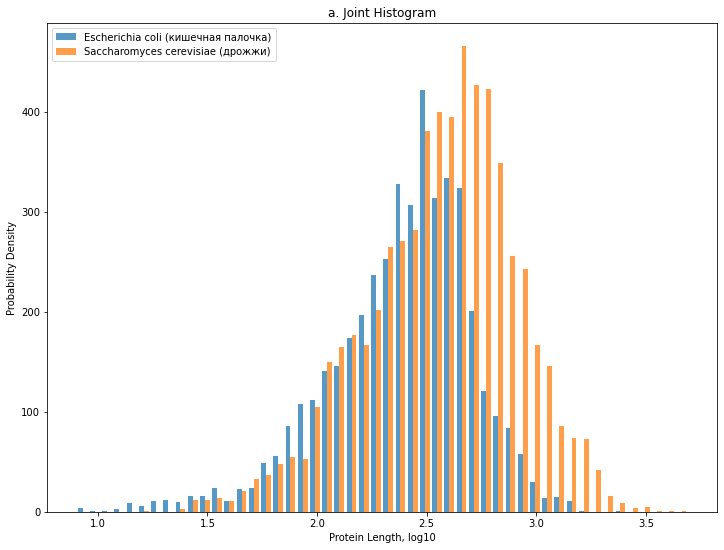

In [5]:
fig = plt.figure(figsize=(12, 9))
ax = fig.gca()
ax.hist(log_dist, bins=50, alpha=0.75)
ax.legend(legend, loc='upper left')
ax.set_title('a. Joint Histogram')
ax.set_xlabel('Protein Length, log10')
ax.set_ylabel('Probability Density')
fig.savefig('img/a.png')

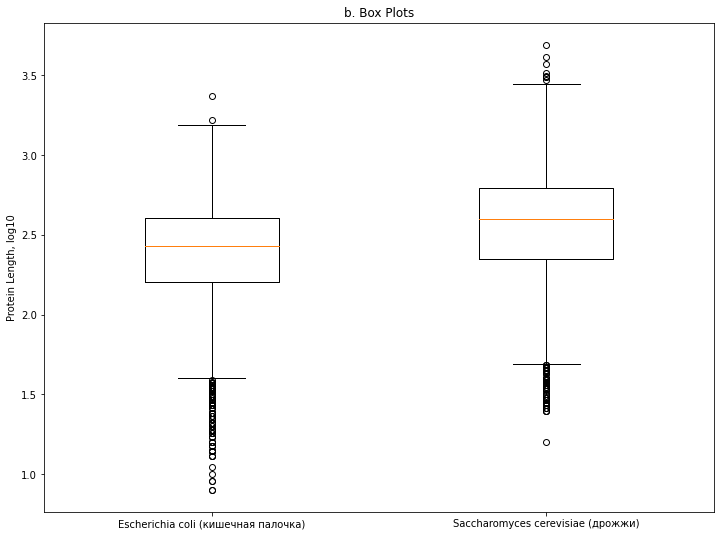

In [6]:
fig = plt.figure(figsize=(12, 9))
ax = fig.gca()
ax.boxplot(log_dist, widths=0.4)
ax.set_xticklabels(legend)
ax.set_title('b. Box Plots')
ax.set_ylabel('Protein Length, log10')
fig.savefig('img/b.png')

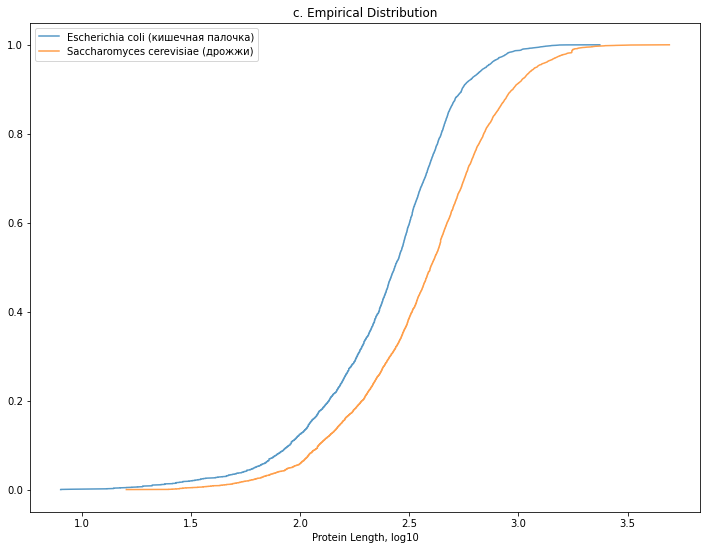

In [7]:
ecdf = [ECDF(d.squeeze()) for d in log_dist]
fig = plt.figure(figsize=(12, 9))
ax = fig.gca()
ax.plot(ecdf[0].x, ecdf[0].y, alpha=0.75)
ax.plot(ecdf[1].x, ecdf[1].y, alpha=0.75)
ax.legend(legend, loc='upper left')
ax.set_title('c. Empirical Distribution')
ax.set_xlabel('Protein Length, log10')
fig.savefig('img/c.png')